# 5 Modelling and optimisation

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#5-Modelling-and-optimisation" data-toc-modified-id="5-Modelling-and-optimisation-1">5 Modelling and optimisation</a></span><ul class="toc-item"><li><span><a href="#5.1-Introduction" data-toc-modified-id="5.1-Introduction-1.1">5.1 Introduction</a></span></li><li><span><a href="#5.2-Get-datasets" data-toc-modified-id="5.2-Get-datasets-1.2">5.2 Get datasets</a></span></li><li><span><a href="#5.3-Interpretation-of-the-data" data-toc-modified-id="5.3-Interpretation-of-the-data-1.3">5.3 Interpretation of the data</a></span></li></ul></li></ul></div>

## 5.1 Introduction

In this sections, we will build some models to describe environmental processes. We wil then use observational data to calibrate and test these models.


## 5.2 Get datasets

We first get the datasets we will need.

These are the MODIS LAI and land cover data and associated ECMWF temperature data. Datasets are available in `npz` files that we have previously generated.

In [37]:
# required general imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline
import numpy as np
import sys
import os
from pathlib import Path
import gdal
from datetime import datetime, timedelta
from geog0111.geog_data import procure_dataset

In [74]:
# conditions
year = 2016
country_code = 'UK'

In [75]:
'''
Load the prepared LAI data
'''
# read in the LAI data for given country code
lai_filename = f'data/lai_data_{year}_{country_code}.npz'
# get the dataset in case its not here
procure_dataset(Path(lai_filename).name,verbose=False)

lai_data = np.load(lai_filename)
print(lai_filename,list(lai_data.keys()))

# unload for use
dates, lai, weights, interpolated_lai = lai_data['dates'],lai_data['lai'],\
                            lai_data['weights'],lai_data['interpolated_lai']
lai[weights==0.] = np.nan

print(lai.shape)

data/lai_data_2016_UK.npz ['dates', 'lai', 'weights', 'interpolated_lai']
(2624, 1396, 92)


Recall that land cover is interpreted as:


| Name | Value | Description |  
|------|-------|-------------|
|Water Bodies|0|At least 60% of area is covered by permanent water bodies.|
|Grasslands|1|Dominated by herbaceous annuals (<2m) includ- ing cereal croplands.|
|Shrublands|2|Shrub (1-2m) cover >10%.|
|Broadleaf Croplands|3|Dominated by herbaceous annuals (<2m) that are cultivated with broadleaf crops.|
|Savannas|4|Between 10-60% tree cover (>2m).|
|Evergreen Broadleaf Forests|5|Dominated by evergreen broadleaf and palmate trees (>2m). Tree cover >60%.|
|Deciduous Broadleaf Forests|6|Dominated by deciduous broadleaf trees (>2m). Tree cover >60%.|
|Evergreen Needleleaf Forests|7|Dominated by evergreen conifer trees (>2m). Tree cover >60%.|
|Deciduous Needleleaf Forests|8|Dominated by deciduous needleleaf (larch) trees (>2m). Tree cover >60%.|
|Non-Vegetated Lands|9|At least 60% of area is non-vegetated barren (sand, rock, soil) or permanent snow and ice with less than 10% vegetation.|
|Urban and Built-up Lands|10|At least 30% impervious surface area including building materials, asphalt, and vehicles.|
|Unclassified|255|Has not received a map label because of missing inputs.|

data/landcover_2016_UK.npz ['LC_Type3', 'lc_data']
['Water Bodies' 'Grasslands' 'Shrublands' 'Broadleaf Croplands' 'Savannas'
 'Evergreen Broadleaf Forests' 'Deciduous Broadleaf Forests'
 'Evergreen Needleleaf Forests' 'Deciduous Needleleaf Forests'
 'Non-Vegetated Lands' 'Urban and Built-up Lands']
(2624, 1396)


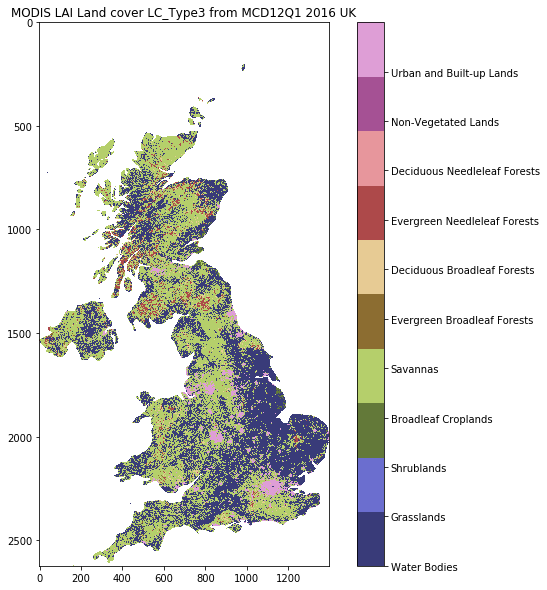

In [76]:
'''
Load the prepared landcover data
'''
# read in the LAI data for given country code
lc_filename = f'data/landcover_{year}_{country_code}.npz'
# get the dataset in case its not here
procure_dataset(Path(lc_filename).name,verbose=False)

lc_data = np.load(lc_filename)
print(lc_filename,list(lc_data.keys()))

# unload for use
LC_Type3, lc_data = lc_data['LC_Type3'],lc_data['lc_data']

from geog0111.plot_landcover import plot_land_cover
print(plot_land_cover(lc_data,year,country_code))
print(lc_data.shape)

In [77]:

'''
Load the prepared T 2m data
'''
t2_filename = f'data/europe_data_{year}_{country_code}.npz'
# get the dataset in case its not here
procure_dataset(Path(t2_filename).name,verbose=False)
t2data = np.load(t2_filename)
print(t2_filename,list(t2data.keys()))

timer, temp2, extent = t2data['timer'], t2data['temp2'], t2data['extent']
print(temp2.shape)

data/europe_data_2016_UK.npz ['timer', 'temp2', 'extent']
(366, 2624, 1396)


Now let's plot the datasets:

/Users/plewis/anaconda/envs/geog0111/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice


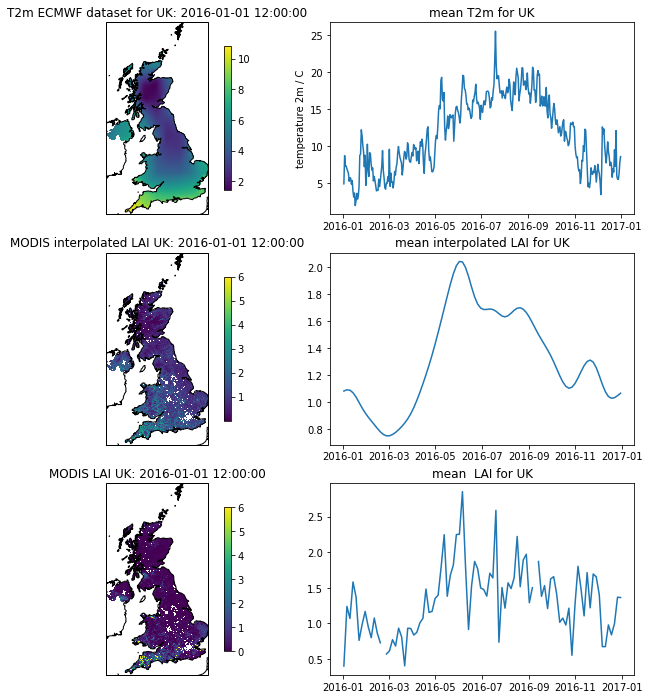

In [78]:
# visualise the interpolated dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
%matplotlib inline

plt.figure(figsize=(12,12))
ax = plt.subplot ( 3, 2, 1 ,projection=ccrs.Sinusoidal.MODIS)
ax.coastlines('10m')
ax.set_title(f'T2m ECMWF dataset for {country_code}: {str(t2data["timer"][0])}')
im = ax.imshow(temp2[0],extent=extent)
plt.colorbar(im,shrink=0.75)

ax = plt.subplot ( 3, 2, 3 ,projection=ccrs.Sinusoidal.MODIS)
ax.coastlines('10m')
ax.set_title(f'MODIS interpolated LAI {country_code}: {str(t2data["timer"][0])}')
im = plt.imshow(interpolated_lai[:,:,0],vmax=6,extent=extent)
plt.colorbar(im,shrink=0.75)

ax = plt.subplot ( 3, 2, 5 ,projection=ccrs.Sinusoidal.MODIS)
ax.coastlines('10m')
ax.set_title(f'MODIS LAI {country_code}: {str(t2data["timer"][0])}')
im = plt.imshow(lai[:,:,0],vmax=6,extent=extent)
plt.colorbar(im,shrink=0.75)



plt.subplot ( 3, 2, 2 )
plt.title(f'mean T2m for {country_code}')
plt.plot(timer,np.nanmean(temp2,axis=(1,2)))
plt.ylabel('temperature 2m / C')
plt.subplot ( 3,2, 4 )
plt.title(f'mean interpolated LAI for {country_code}')
mean = np.nanmean(interpolated_lai,axis=(0,1))
plt.plot(timer[::4],mean)
plt.subplot ( 3,2, 6 )
plt.title(f'mean  LAI for {country_code}')
mean = np.nanmean(lai,axis=(0,1))
plt.plot(timer[::4],mean)



## 5.3 Interpretation of the data

We can see that the raw LAI temporal profile (bottom right plot) can be very noisy, even when averaged spatially. 

The 'true' temporal profile is probably much better represented in the 'interpolated LAI' dataset, although this may be ober-smoothed.

From the interpolated dataset, we see that the LAI trajectory 'takes off' in the Spring (March/April), and 'falls' in the Autumn (October/November), which is the pattern we would expect of Western European vegetation. There is some evidence of multiple 'peaks' in the higher LAI values, which is suggestive of the signal being a compound of thebehaviour of multiple vegetation types.

The periods of rapid change in LAI correspond to when the mean (2m) temperature is around 10 C.

Now let's look at a particular land cover type: grasslands. 

In [80]:
lc = 1

# need 2 versions of this as datasets 
# have time stacked differently
flc_data1 = lc_data[...,np.newaxis]
flc_data2 = lc_data[np.newaxis,...]

for d in [flc_data1,flc_data2]:
    mask = d==lc
    d[mask]  = 1
    d[~mask] = 0

/Users/plewis/anaconda/envs/geog0111/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice


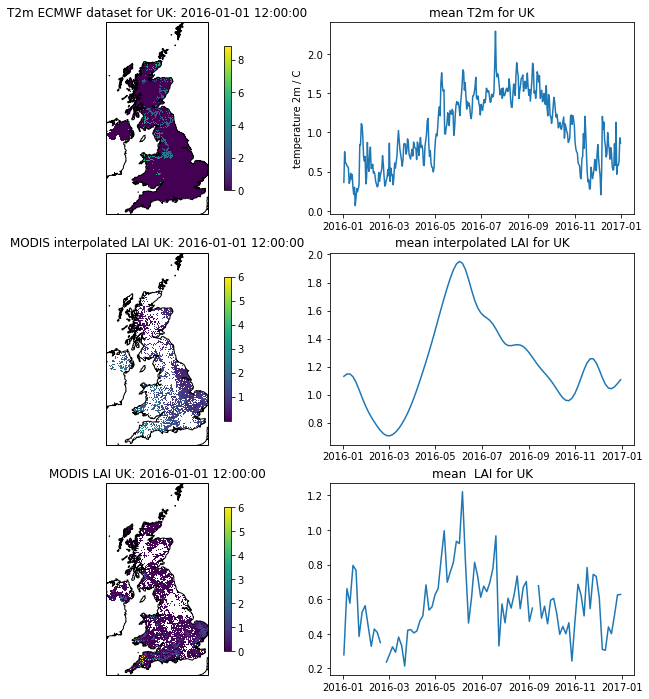

In [82]:
'''
filter datasets by land cover
'''
interpolated_lai_ = interpolated_lai*flc_data1
interpolated_lai_[interpolated_lai_==0] = np.nan
lai_ = lai*flc_data1
lai_[lai==0] = np.nan
temp2_ = temp2*flc_data2
temp2_[temp2==0] = np.nan

plt.figure(figsize=(12,12))
ax = plt.subplot ( 3, 2, 1 ,projection=ccrs.Sinusoidal.MODIS)
ax.coastlines('10m')
ax.set_title(f'T2m ECMWF dataset for {country_code}: {str(t2data["timer"][0])}')
im = ax.imshow((temp2_)[0],extent=extent)
plt.colorbar(im,shrink=0.75)

ax = plt.subplot ( 3, 2, 3 ,projection=ccrs.Sinusoidal.MODIS)
ax.coastlines('10m')
ax.set_title(f'MODIS interpolated LAI {country_code}: {str(t2data["timer"][0])}')
im = plt.imshow(interpolated_lai_[:,:,0],vmax=6,extent=extent)
plt.colorbar(im,shrink=0.75)

ax = plt.subplot ( 3, 2, 5 ,projection=ccrs.Sinusoidal.MODIS)
ax.coastlines('10m')
ax.set_title(f'MODIS LAI {country_code}: {str(t2data["timer"][0])}')
im = plt.imshow((lai_)[:,:,0],vmax=6,extent=extent)
plt.colorbar(im,shrink=0.75)

plt.subplot ( 3, 2, 2 )
plt.title(f'mean T2m for {country_code}')
plt.plot(timer,np.nanmean(temp2_,axis=(1,2)))
plt.ylabel('temperature 2m / C')
plt.subplot ( 3,2, 4 )
plt.title(f'mean interpolated LAI for {country_code}')
mean = np.nanmean(interpolated_lai_,axis=(0,1))
plt.plot(timer[::4],mean)
plt.subplot ( 3,2, 6 )
plt.title(f'mean  LAI for {country_code}')
mean = np.nanmean(lai_,axis=(0,1))
plt.plot(timer[::4],mean)


